# Numpy

In [189]:
import numpy as np
import matplotlib.pyplot as plt
# np.set_printoptions(threshold=np.inf) # print the whole array in notebook

## Creating Arrays

In [190]:
a1 = np.array([3, 7, 5, 8])
a2 = np.zeros(10) # array with 10 zeroes
a3 = np.ones(10) # array with 10 ones
a4 = np.random.random(10) # array with 10 random numbers
a5 = np.random.randn(10) # array with 10 numbers sampled for Standard Normal Distribution
a6 = np.linspace(0, 10, 10) # array with 10 equally spaced numbers from 0 to 10
a7 = np.arange(0, 10, 1) # array with equally spaced numbers from 0 to 10

## Array Operations

In [191]:
print(2*a1) # element wise arithmetic
print(2+a1) # element wise arithmetic
print(2-a1) # element wise arithmetic
print(a1/2) # element wise arithmetic
print(a1%2) # element wise arithmetic
print(a1>4) # boolean array
print(a1[a1>4]) # selects the elements for which index of boolean array is True

[ 6 14 10 16]
[ 5  9  7 10]
[-1 -5 -3 -6]
[1.5 3.5 2.5 4. ]
[1 1 1 0]
[False  True  True  True]
[7 5 8]


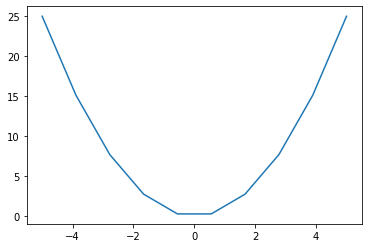

In [192]:
x = np.linspace(-5, 5, 10)
plt.plot(x, x**2)
plt.show()

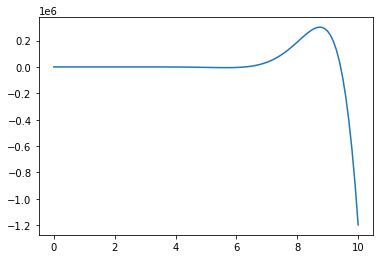

In [193]:
def f(x):
    '''
    Since a numpy array is passed
    computation is done for each element
    and returned as a numpy array
    '''
    return x**2 * np.sin(x) / np.exp(-x)

x = np.linspace(0, 10, 100)
y = f(x)

plt.plot(x,y)
plt.show()

In [194]:
names = np.array(["jim", "luke", "josh", "pete"])

# get names starting with j

# help(np.vectorize)

first_letter_j = np.vectorize(lambda s: s[0])
print(first_letter_j) # is a callable function
print(first_letter_j(names)) # returns the value specified in callback function
print(first_letter_j(names) == "j") # numpy array of type boolean
print(names[first_letter_j(names) == "j"]) # get names starting with 'j'

['j' 'l' 'j' 'p']
[ True False  True False]
['jim' 'josh']


## Calculus and Statistics

In [195]:
a1 = 2 * np.random.randn(1000) + 10
# Standard Deviation = 2
# Mean = 10

In [196]:
print(a1.mean()) # returs a number close to mean
print(np.mean(a1)) # returs a number close to mean

print(np.std(a1)) # returs a number close to stanadard deviation
print(a1.std()) # returs a number close to stanadard deviation

p = 80
print(np.percentile(a1, p)) # returns F, where p% of numbers are less than F

10.053283129366642
10.053283129366642
1.9474273449606079
1.9474273449606079
11.73998561591516


## Integrals and Derivatives

In [197]:
x = np.linspace(1, 10, 100)
y = 1/x**2 * np.sin(x)

dydx = np.gradient(y, x) # derivative

# np.cumsum(y) # cummulative sum

y_int = np.cumsum(y) * (x[1] - x[0])
# OR
# y_int = np.cumsum(y) * np.diff(x)[0] 

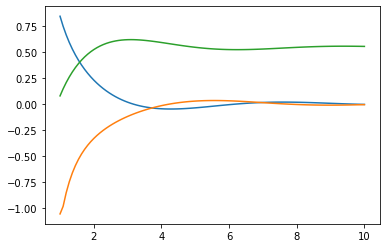

In [198]:
plt.plot(x ,y)
plt.plot(x ,dydx)
plt.plot(x ,y_int)
plt.show()

![Ex 1](./numpyEx1.png)

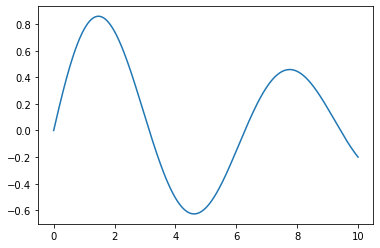

In [199]:
# 1
N = 10000
x = np.linspace(0, 10, N+1)
y = np.exp(-x/10) * np.sin(x)

plt.plot(x, y)
plt.show()

In [200]:
# 2

# long method
# four_seven = np.vectorize(lambda s: 4 <= s <= 7)
# req_int = y[four_seven(x)]

# short method
req_int = y[(x >= 4) * (x <= 7)]

mean = np.mean(req_int)
sd = np.std(req_int)


print(f'Mean = {mean}')
print(f'SD = {sd}')

Mean = -0.2956023068963138
SD = 0.31448753875085117


In [201]:
# 3

ym = np.percentile(req_int, 80)

print(ym)

0.06145551274590662


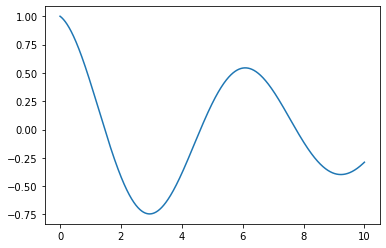

In [202]:
# 4
dydx = np.gradient(y, x)

plt.plot(x, dydx)
plt.show()

In [203]:
# 5
## Not going to be exactly zero
## So have to da trick

ex_first = dydx[1:]
ex_last = dydx[:-1]

## ex_first * ex_last is essentially mutiplying consecutive values 
## if the product is < 0 then there is change of sign
## if the product is > 0 then there is no change of sign


zero_der = (x[1:])[ex_first*ex_last < 0]

print(zero_der)

[1.472 4.613 7.755]


![Ex 2](./numpyEx2.png)

In [204]:
nums = np.arange(0, 10001, 1)
print(np.sum(nums[(nums%4 !=0) * (nums%7 !=0)]))

32147142


![Ex 3](./numpyEx3.png)

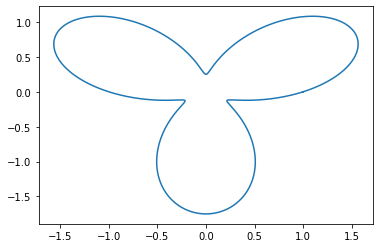

In [205]:
# 1

theta = np.linspace(0, 2*np.pi, 1000)
r = 1+(3/4)*np.sin(3*theta)

x = r*np.cos(theta)
y = r*np.sin(theta)

plt.plot(x, y)
plt.show()


In [206]:
# 2

print(sum(0.5*r**2)*(theta[1]-theta[0]))

4.028310324802908


In [207]:
# 3
drd0 = np.gradient(r, theta)

integrand = np.sqrt(r**2 + drd0**2)

print(sum(integrand)*(theta[1]-theta[0]))


11.640021569013872


![Ex 4](./numpyEx4.png)

$$ P / (A \sigma \epsilon T_0^4) = \left( \frac{1}{1+e^{-kt}}\right)^4$$

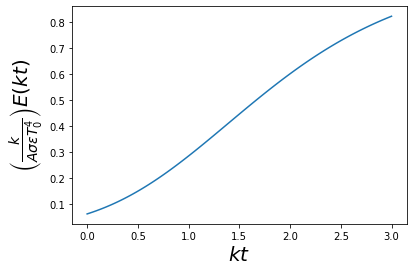

In [208]:
kt = np.linspace(0, 3, 100)
P = (1/(1+np.exp(-kt))) ** 4
E = np.cumsum(P) * kt[1] - kt[0]

plt.plot(kt, P)
plt.xlabel('$kt$', fontsize=20)
plt.ylabel(r'$\left(\frac{k}{A \sigma \epsilon T_0^4} \right) E(kt)$', fontsize=20)
plt.show()

## Multidimensional Array

In [209]:
a1 = np.array([[4,6,4], [1,2,2],[6,8,7]])
print(a1)
print(a1*2)
print(a1.ravel())
print(a1>5)

[[4 6 4]
 [1 2 2]
 [6 8 7]]
[[ 8 12  8]
 [ 2  4  4]
 [12 16 14]]
[4 6 4 1 2 2 6 8 7]
[[False  True False]
 [False False False]
 [ True  True  True]]


In [210]:
a2 = np.random.rand(3,3)

print(a2)
print(a2*10 > a1)

[[0.59547973 0.70592611 0.61279098]
 [0.43101999 0.6800837  0.12653412]
 [0.79709193 0.10800966 0.07594302]]
[[ True  True  True]
 [ True  True False]
 [ True False False]]


In [211]:
print(a1[:,0]) # go across all rows and pick element 0
print(a1[:,0:2]) # go across all rows and pick element from 0 to 2 (exclusive)
print(a1[1:,1])
print(a1[1:,:2])

[4 1 6]
[[4 6]
 [1 2]
 [6 8]]
[2 8]
[[1 2]
 [6 8]]


## Meshgrids

### used to generate multivariate functions

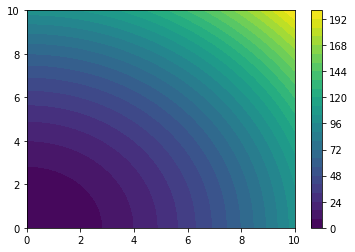

In [212]:
x = np.linspace(0, 10, 1000)
y = np.linspace(0, 10, 1000)

xv, yv = np.meshgrid(x, y)
# xv = 2d array with all same values along a column
# xy = 2d array with all same values along a row

zv = xv**2 + yv**2

plt.contourf(xv, yv, zv, levels=30)
plt.colorbar()
plt.show()

# plt.plot(xv, yv)
# plt.show() # to see what is happening. basically creates a R**2 space

## Matrix Operations

In [213]:
A = np.array([[3,2,1],[5,-5,4],[6,0,1]])
b1 = np.array([1,2,3])
b2 = np.array([-1,2,-5])

In [214]:
print(A@b1) # matrix times vector
print(A.T) # transpose
print(np.dot(b1,b2)) # dot product
print(np.cross(b1,b2)) # cross product

[10  7  9]
[[ 3  5  6]
 [ 2 -5  0]
 [ 1  4  1]]
-12
[-16   2   4]


## System of equations

$3x + 2y + z = 4$  
$5x -5y + 4z = 3$  
$6x + z = 0$  

In [215]:
A = np.array([[3,2,1],[5,-5,4],[6,0,1]])
c = np.array([4,3,0])

In [216]:
print(np.linalg.solve(A,c)) # solve Ax = c

[-0.49056604  1.26415094  2.94339623]


## Eigenvalues

In [217]:
A = np.array([[4,2,2],[2,4,2],[2,2,4]])
print(np.linalg.eigvals(A)) # return eigen values
(eval, evec) = np.linalg.eig(A) # eigenvalues and vectors
print(eval)
print(evec) # this is in the form [V1, V2, ..] so columns are the vectors

[2. 8. 2.]
[2. 8. 2.]
[[-0.81649658  0.57735027  0.50669854]
 [ 0.40824829  0.57735027 -0.80782419]
 [ 0.40824829  0.57735027  0.30112565]]


![Ex 5](./numpyEx5.png)

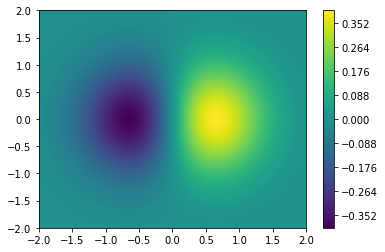

In [218]:
# 1
x = np.linspace(-2, 2, 1000)
y = np.linspace(-2, 2, 1000)

xv, yv = np.meshgrid(x, y)

r = xv**2 + yv**2

f = np.exp(-r)*np.sin(xv)

plt.contourf(xv, yv, f, levels=100)
plt.colorbar()
plt.show()

In [219]:
# 2
print((np.abs(f.ravel()) * np.diff(x)[0] * np.diff(y)[0]).sum())

1.4861858145124316


In [220]:
# 3
# print(np.abs((f[np.sqrt(r) > 0.5].ravel())).sum())
print((np.abs(f[np.sqrt(r) > 0.5].ravel()) * np.diff(x)[0] * np.diff(y)[0]).sum())
# print(np.sqrt(r))

1.3447652930203164


![Ex 6](./numpyEx6.png)

In [221]:
V = np.array([
    [3, 2, 3, 10],
    [2, -2, 5, 8],
    [3, 3, 4, 9],
    [3, 4, -3, -7]
])
C = np.array([4, 1, 3, 2])

print(np.linalg.solve(V,C))

[ 0.78378378  0.03603604 -0.67567568  0.36036036]


![Ex 7](./numpyEx7.png)

In [222]:
# 1
t = np.linspace(0, 10, 100)
z = np.linspace(0, 4*np.pi, 100)

# mesh

tv, zv = np.meshgrid(t, z)

Ex = np.cos(zv-tv)
Ey = 2*np.cos(zv-tv+np.pi*0.5)
Ez = 0*tv

E<sub>x</sub> as a function of t at z = 0

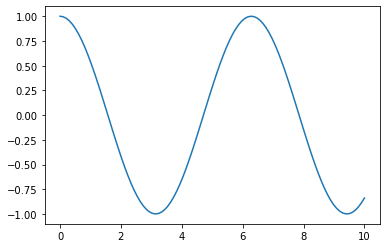

In [223]:
plt.plot(t,Ex[0])
# OR
# plt.plot(t,Ex[zv==0])

E<sub>x</sub> as a function of z at t = 0

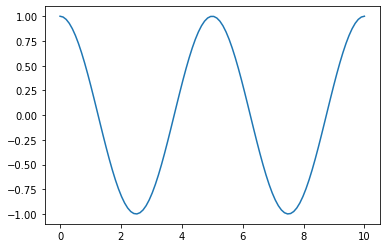

In [224]:
plt.plot(t,Ex[:,0])
# OR
# plt.plot(t,Ex[tv==0])

In [225]:
E = np.array([Ex, Ey, Ez])
E = np.swapaxes(E, 0, -1)

B = np.cross(np.array([0,0,1]),E)
B = np.swapaxes(B, 0, -1)
Bx, By, Bz = B
B = np.swapaxes(B, 0, -1)
B

array([[[-1.22464680e-16,  1.00000000e+00,  0.00000000e+00],
        [ 2.53184907e-01,  9.91954813e-01, -0.00000000e+00],
        [ 5.02295974e-01,  9.67948701e-01, -0.00000000e+00],
        ...,
        [-5.02295974e-01,  9.67948701e-01,  0.00000000e+00],
        [-2.53184907e-01,  9.91954813e-01,  0.00000000e+00],
        [-1.10218212e-15,  1.00000000e+00,  0.00000000e+00]],

       [[-2.01676841e-01,  9.94902816e-01,  0.00000000e+00],
        [ 5.18400645e-02,  9.99664020e-01, -0.00000000e+00],
        [ 3.04522843e-01,  9.88340255e-01, -0.00000000e+00],
        ...,
        [-6.94948515e-01,  9.37689522e-01,  0.00000000e+00],
        [-4.51948690e-01,  9.74133253e-01,  0.00000000e+00],
        [-2.01676841e-01,  9.94902816e-01,  0.00000000e+00]],

       [[-4.01297713e-01,  9.79663226e-01,  0.00000000e+00],
        [-1.50033255e-01,  9.97182283e-01,  0.00000000e+00],
        [ 1.03645294e-01,  9.98656304e-01, -0.00000000e+00],
        ...,
        [-8.80516495e-01,  8.97871191e-01,

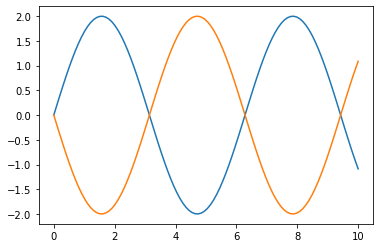

In [226]:
plt.plot(t, Ey[0])
plt.plot(t, Bx[0])

In [227]:
#2
S = np.cross(B,E)
S = np.swapaxes(S, 0, -1)
Sx , Sy, Sz = S
S = np.swapaxes(S, 0, -1)
S

array([[[ 0.        ,  0.        , -1.        ],
        [ 0.        , -0.        , -1.04807695],
        [ 0.        , -0.        , -1.18922593],
        ...,
        [ 0.        ,  0.        , -1.18922593],
        [ 0.        ,  0.        , -1.04807695],
        [ 0.        ,  0.        , -1.        ]],

       [[ 0.        ,  0.        , -1.03050516],
        [ 0.        , -0.        , -1.00201554],
        [ 0.        , -0.        , -1.06955062],
        ...,
        [ 0.        ,  0.        , -1.36221508],
        [ 0.        ,  0.        , -1.15319321],
        [ 0.        ,  0.        , -1.03050516]],

       [[ 0.        ,  0.        , -1.12077989],
        [ 0.        ,  0.        , -1.01688248],
        [ 0.        , -0.        , -1.00805676],
        ...,
        [ 0.        ,  0.        , -1.58148197],
        [ 0.        ,  0.        , -1.31308889],
        [ 0.        ,  0.        , -1.12077989]],

       ...,

       [[ 0.        , -0.        , -1.39879671],
        [ 0

![Ex 8](./numpyEx8.png)

![maths1](./maths1.png)

In [228]:
N = 1000
x = np.linspace(0, 1, N +1 )
dx = np.diff(x)[0]

In [229]:
main_diagonal = -2*np.ones(N-1)
off_diagonal = np.ones(N-2)

# print(np.diag(main_diagonal))
# print(np.diag(off_diagonal, 1))
# print(np.diag(off_diagonal, -1))

d2dx2 = (np.diag(main_diagonal) + np.diag(off_diagonal, 1) + np.diag(off_diagonal, -1))/dx**2
d2dx2

array([[-2000000.,  1000000.,        0., ...,        0.,        0.,
               0.],
       [ 1000000., -2000000.,  1000000., ...,        0.,        0.,
               0.],
       [       0.,  1000000., -2000000., ...,        0.,        0.,
               0.],
       ...,
       [       0.,        0.,        0., ..., -2000000.,  1000000.,
               0.],
       [       0.,        0.,        0., ...,  1000000., -2000000.,
         1000000.],
       [       0.,        0.,        0., ...,        0.,  1000000.,
        -2000000.]])

In [230]:
hx = np.diag((10*x[1:-1])**2)
hx

array([[1.00000e-04, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [0.00000e+00, 4.00000e-04, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [0.00000e+00, 0.00000e+00, 9.00000e-04, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 9.94009e+01,
        0.00000e+00, 0.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        9.96004e+01, 0.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 9.98001e+01]])

In [232]:
operator = d2dx2 + hx
operator

array([[-1999999.9999,  1000000.    ,        0.    , ...,        0.    ,
               0.    ,        0.    ],
       [ 1000000.    , -1999999.9996,  1000000.    , ...,        0.    ,
               0.    ,        0.    ],
       [       0.    ,  1000000.    , -1999999.9991, ...,        0.    ,
               0.    ,        0.    ],
       ...,
       [       0.    ,        0.    ,        0.    , ..., -1999900.5991,
         1000000.    ,        0.    ],
       [       0.    ,        0.    ,        0.    , ...,  1000000.    ,
        -1999900.3996,  1000000.    ],
       [       0.    ,        0.    ,        0.    , ...,        0.    ,
         1000000.    , -1999900.1999]])

In [234]:
w, v = np.linalg.eigh(operator)

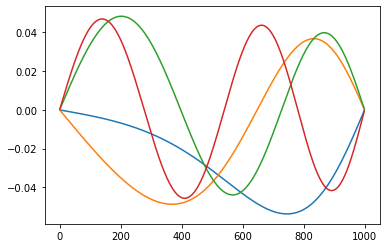

In [240]:
plt.plot(v[:,-1])
plt.plot(v[:,-2])
plt.plot(v[:,-3])
plt.plot(v[:,-4])

## Basic Datasets

In [247]:
data = np.loadtxt('./data.csv',dtype='object',delimiter=',', unpack=False)
data

array([['Region', 'Temp', 'Rainfall', 'Humidity', 'Apples', 'Oranges'],
       ['Kanto', '73', '67', '43', '56', '70'],
       ['Johto', '91', '88', '64', '81', '101'],
       ['Hoenn', '87', '134', '58', '119', '133'],
       ['Sinnoh', '102', '43', '37', '22', '37'],
       ['Unova', '69', '96', '70', '103', '119']], dtype=object)

In [249]:
data = np.loadtxt('./data.csv',dtype='object',delimiter=',', unpack=True)
data

array([['Region', 'Kanto', 'Johto', 'Hoenn', 'Sinnoh', 'Unova'],
       ['Temp', '73', '91', '87', '102', '69'],
       ['Rainfall', '67', '88', '134', '43', '96'],
       ['Humidity', '43', '64', '58', '37', '70'],
       ['Apples', '56', '81', '119', '22', '103'],
       ['Oranges', '70', '101', '133', '37', '119']], dtype=object)

In [253]:
region, temp, rainfall, humidity, apples, oranges = data
region

array(['Region', 'Kanto', 'Johto', 'Hoenn', 'Sinnoh', 'Unova'],
      dtype=object)

In [255]:
data = np.loadtxt('./data.csv',dtype='object',delimiter=',', unpack=True, skiprows=1)
region, temp, rainfall, humidity, apples, oranges = data
region

array(['Kanto', 'Johto', 'Hoenn', 'Sinnoh', 'Unova'], dtype=object)

In [257]:
region = region.astype(str)
region

array(['Kanto', 'Johto', 'Hoenn', 'Sinnoh', 'Unova'], dtype='<U6')

In [259]:
temp = temp.astype(float)
temp

array([ 73.,  91.,  87., 102.,  69.])